<H1>Project - Featurization, Model Selection & Tuning</H1>

In [1]:
# Importing all required Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.metrics import r2_score
from sklearn.metrics import SCORERS

from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
print("########################################################################################")
print("################  All Required Libraies has been imported successfully ################# ")
print("########################################################################################")


########################################################################################
################  All Required Libraies has been imported successfully ################# 
########################################################################################


<H1> Univariate Analysis </H1>

In [2]:
#Load data

concrete_df = pd.read_csv("concrete.csv")
print("################################################")
print("################  Load Data  ###################")
print("################################################")
concrete_df.head()

################################################
################  Load Data  ###################
################################################


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
print("####################################################")
print("################  Dataset info  ###################")
print("####################################################")
concrete_df.info()

####################################################
################  Data set info  ###################
####################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
print("####################################################")
print("################  Describe Of Dataset  #############")
print("####################################################")
concrete_df.describe()

####################################################
################  Describe Of Dataset  #############
####################################################


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


######################################################################
################  Statistical Analysis Using Heat Map ################
######################################################################


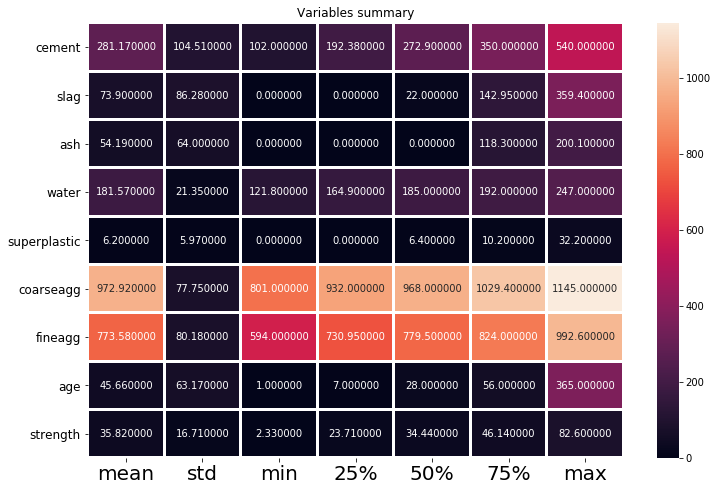

In [23]:
print("######################################################################")
print("################  Statistical Analysis Using Heat Map ################")
print("######################################################################")

plt.figure(figsize=(12,8))
sns.heatmap(round(concrete_df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [11]:
print("######################################################################")
print("################  skewnessof the KEY Colunm  Of Dataset  #############")
print("######################################################################")
concrete_df.describe()
print("Skewness = ",concrete_df['strength'].skew())

######################################################################
################  skewnessof the KEY Colunm  Of Dataset  #############
######################################################################
Skewness =  0.416977288411


<H1> Multivariate Analysis </H1>

##############################################################################################
################  Histogram and Distribution of Indivdual colunm  Of Dataset  ################
##############################################################################################
cement


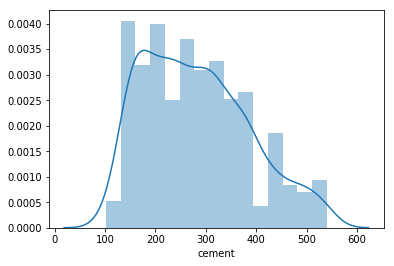

slag


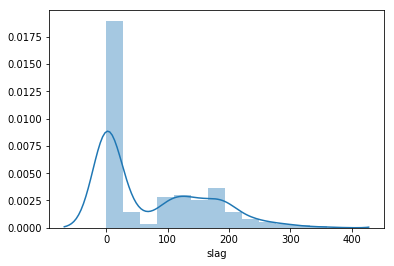

ash


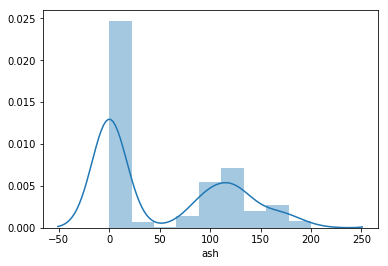

water


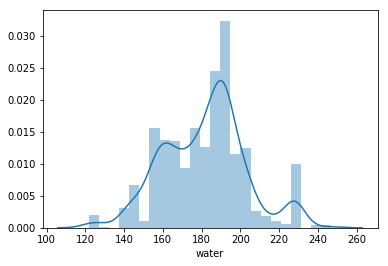

superplastic


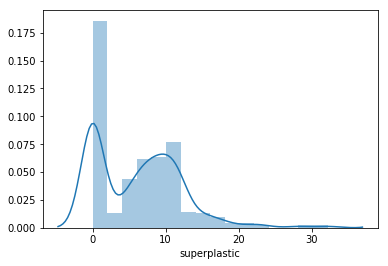

coarseagg


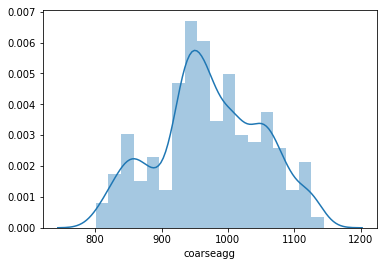

fineagg


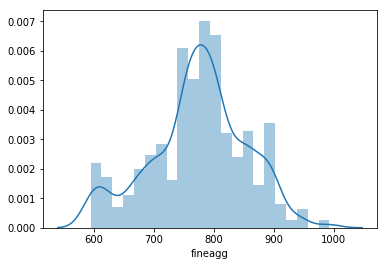

age


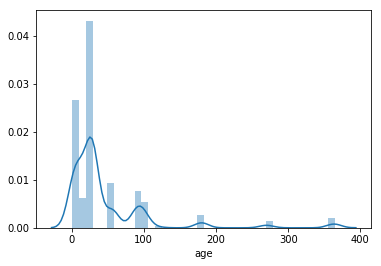

strength


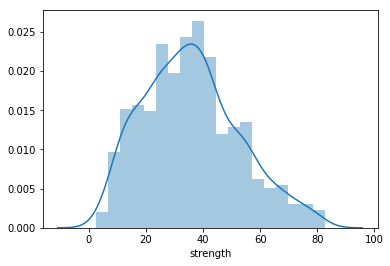

In [14]:
print("##############################################################################################")
print("################  Histogram and Distribution of Indivdual colunm  Of Dataset  ################")
print("##############################################################################################")
l = list(concrete_df.columns.values) 
def plot(concrete_df):
    
    for col in l:
        sns.distplot(concrete_df[col])
        print(col)
        plt.show()
plot(concrete_df)

##############################################################################################
################  Boxplots colunm  Of Dataset  ################
##############################################################################################


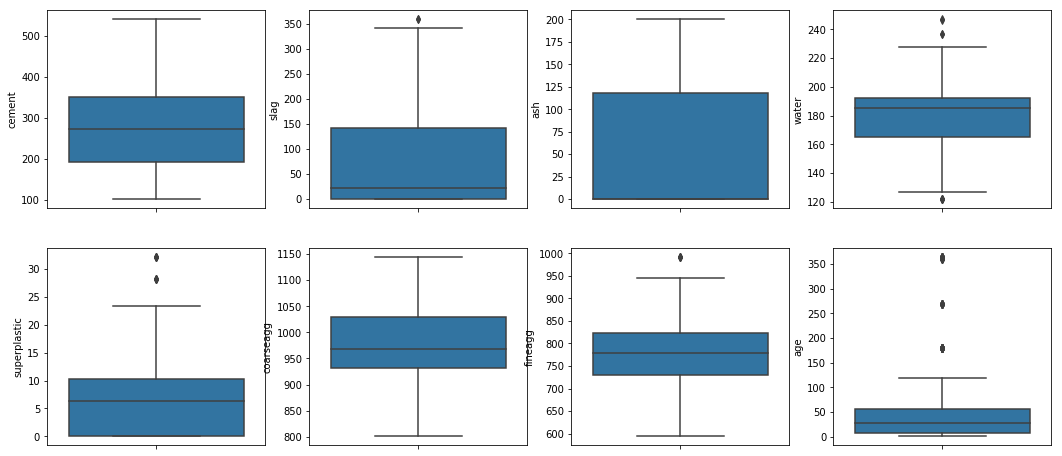

In [15]:
print("##############################################################################################")
print("################  Boxplots colunm  Of Dataset  ################")
print("##############################################################################################")

features_to_analyse = concrete_df.columns[:9]
current_palette = sns.color_palette("Blues")

fig, axes = plt.subplots(round(len(features_to_analyse)/4), 4, figsize = (18, 8))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse):
        sns.boxplot(x=features_to_analyse[i], data = concrete_df, ax = ax, orient = 'v')

In [22]:
print("############################################################################")
print("################  Correlation Analysis Along with Heat Maps ################")
print("############################################################################")

############################################################################
################  Correlation Analysis Along with Heat Maps ################
############################################################################


############################
Correlation of each columns
############################
                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         

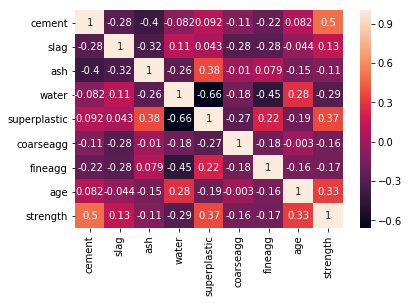

In [24]:
corr = concrete_df.corr()
print("############################")
print("Correlation of each columns")
print("############################")
print(corr)
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot = True)

<h3>
Observation <br>
We could observe, high collinearity between below variables a)Cement and Fly ash & b)Water and Coarse Aggregation
</h3>

In [11]:
from sklearn.preprocessing import MinMaxScaler
data_to_normalize = concrete_df.iloc[:,:-1]
scaler = MinMaxScaler()
scaler.fit_transform(data_to_normalize)

array([[ 0.08972603,  0.58987201,  0.        , ...,  0.49651163,
         0.38760662,  0.07417582],
       [ 0.15273973,  0.11741792,  0.62118941, ...,  0.81337209,
         0.50727546,  0.03571429],
       [ 0.33789954,  0.        ,  0.47826087, ...,  0.45319767,
         0.67034621,  0.07417582],
       ..., 
       [ 0.39817352,  0.32276016,  0.45127436, ...,  0.20087209,
         0.43728048,  0.07417582],
       [ 0.54794521,  0.10573178,  0.        , ...,  0.38081395,
         0.19066734,  0.73901099],
       [ 1.        ,  0.        ,  0.        , ...,  0.94186047,
         0.04766683,  0.01648352]])

<h3> Identifying and Analysis Target Variable</h3>

############################################################################
################  Identifying and Analysis Target Variable ################
############################################################################


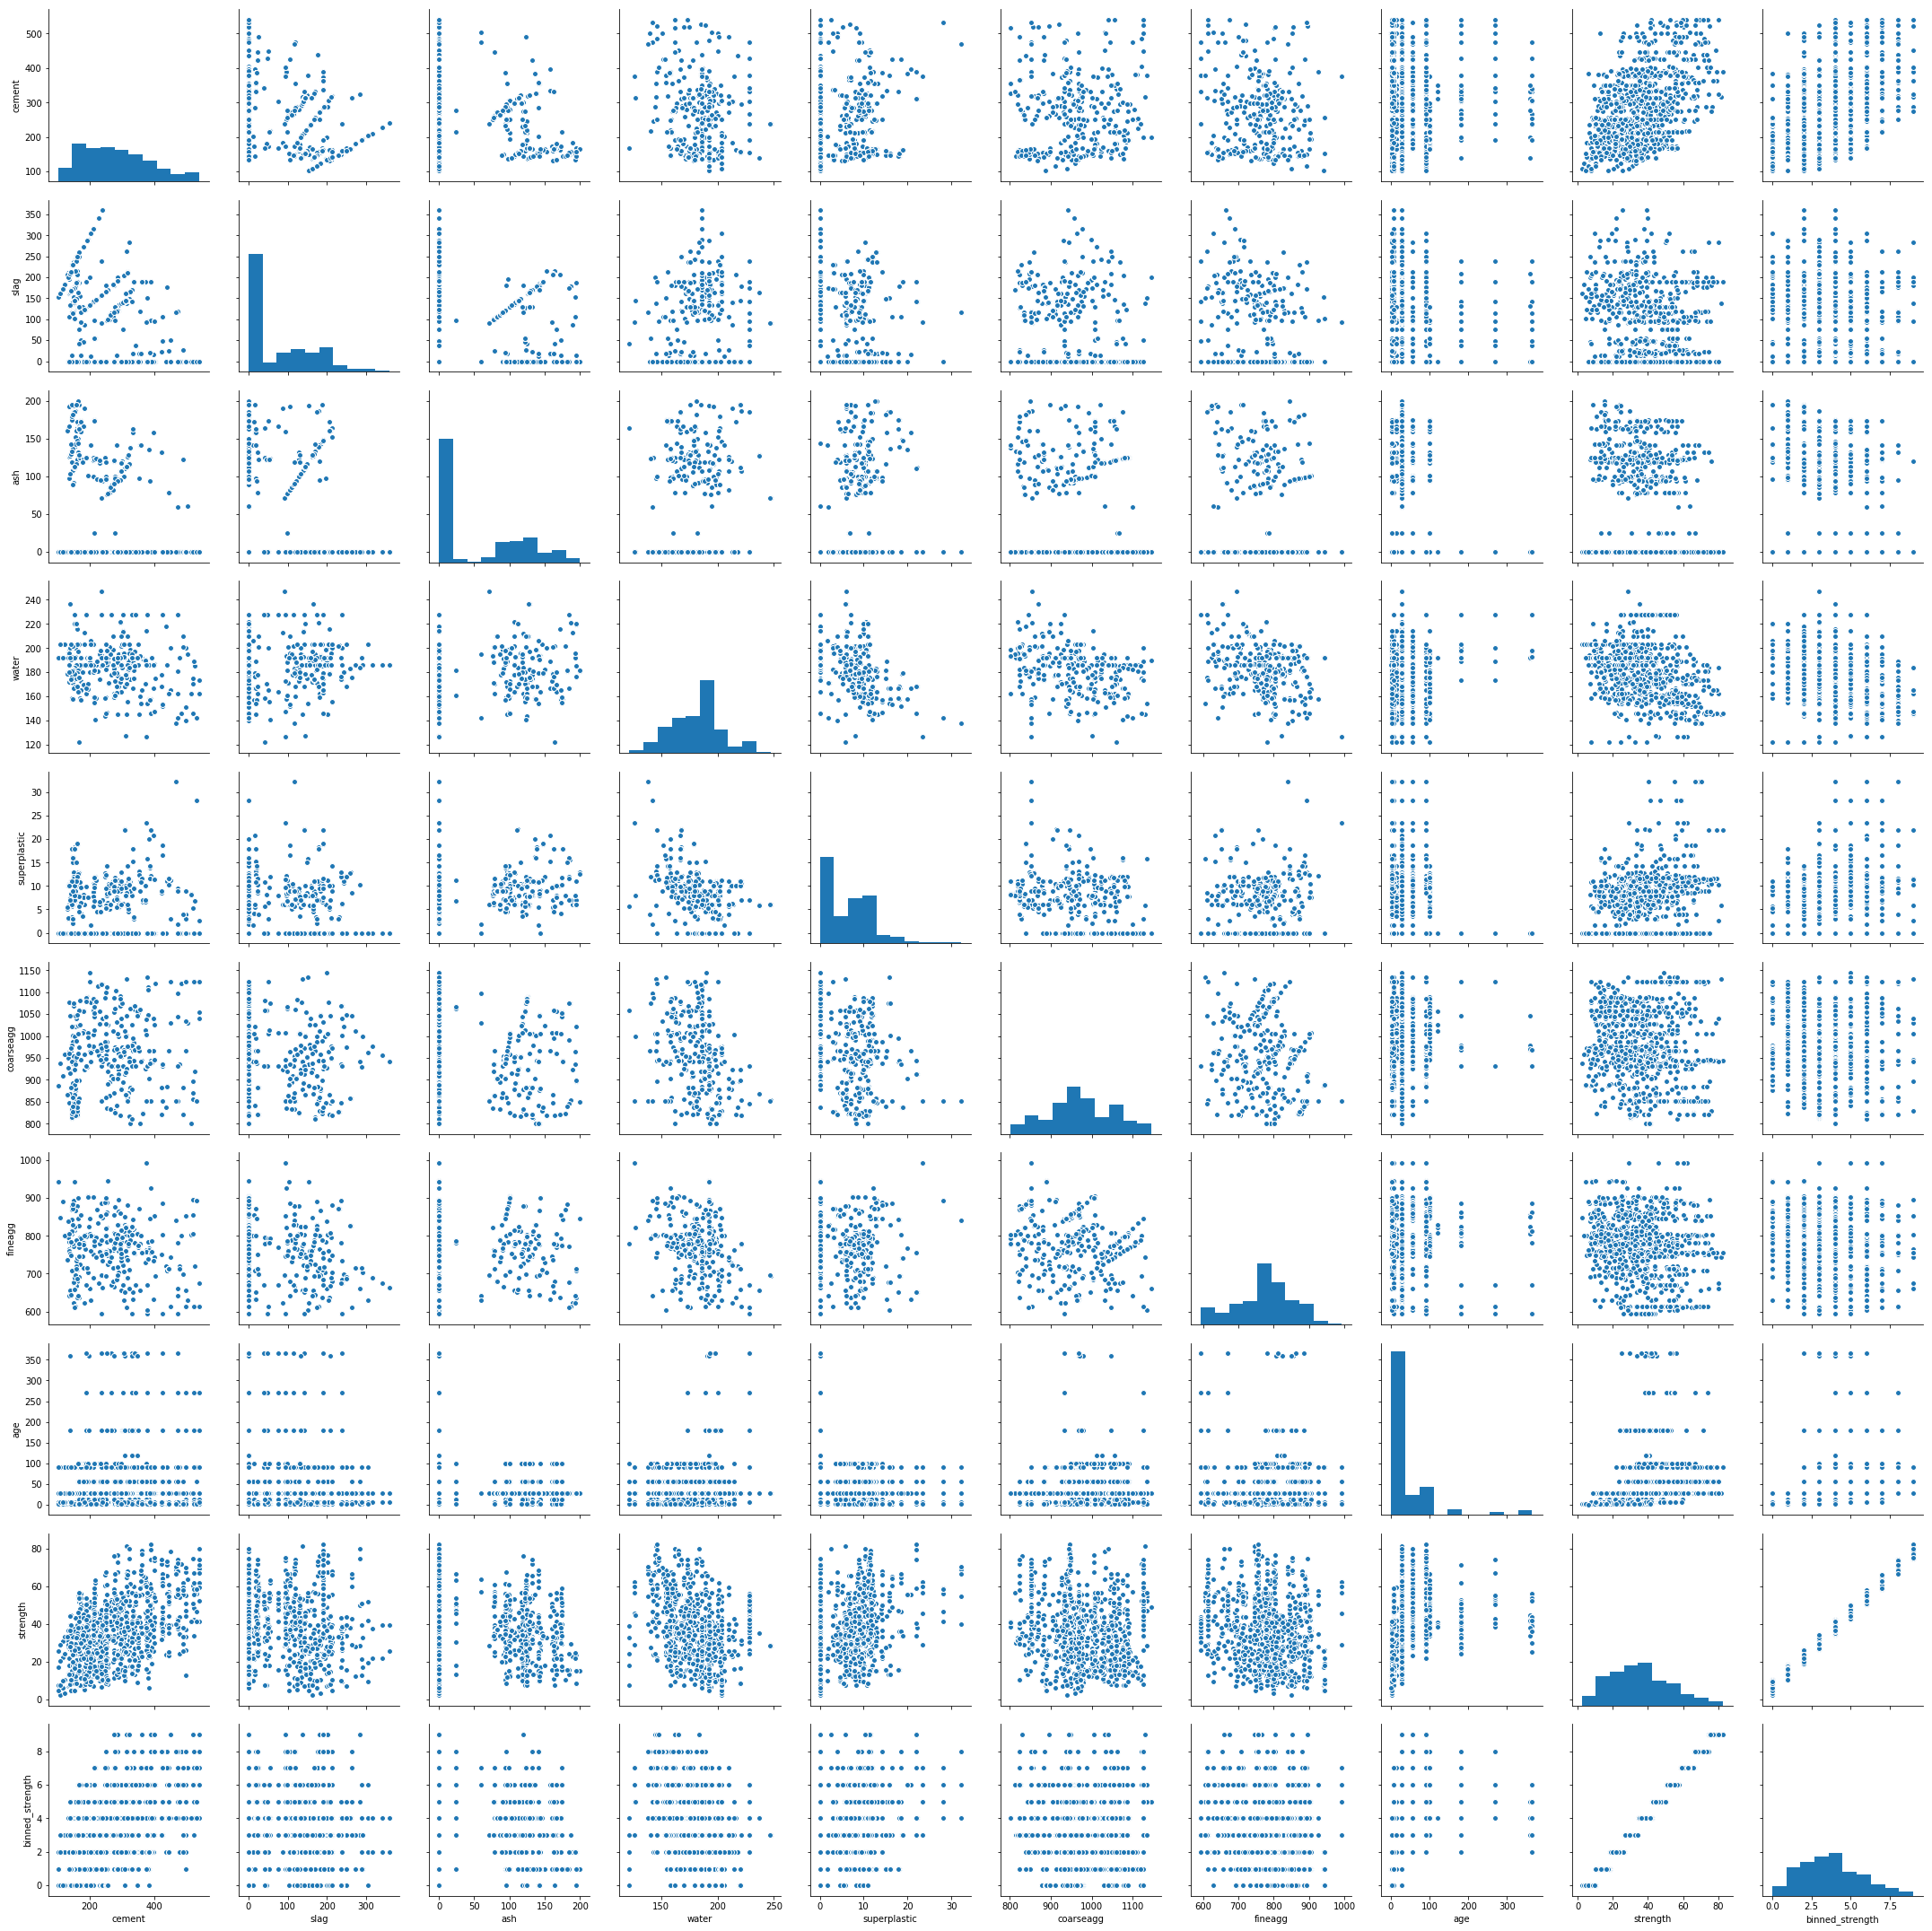

In [41]:
print("############################################################################")
print("################  Identifying and Analysis Target Variable ################")
print("############################################################################")
concrete_df['binned_strength'] = pd.cut(concrete_df['strength'], bins=10, labels=False).values
sns.pairplot(concrete_df,size=3)

<h3>
Observation </h3>
<h4>We could see that some features mostly correlated, 
Water and coarse aggr. 
Negatively correlated showing that large water amount in concrete usually tend to small amount of coarse aggr.
From the histograms, we learn that the fine aggr and are heavily right-skewed.
</h4>

<h3>Analysis on Target (Strength) and Dependent </h3>

#######################################################################################
################  Analysis on Target (Strength) and Dependent Variable  ###############
#######################################################################################


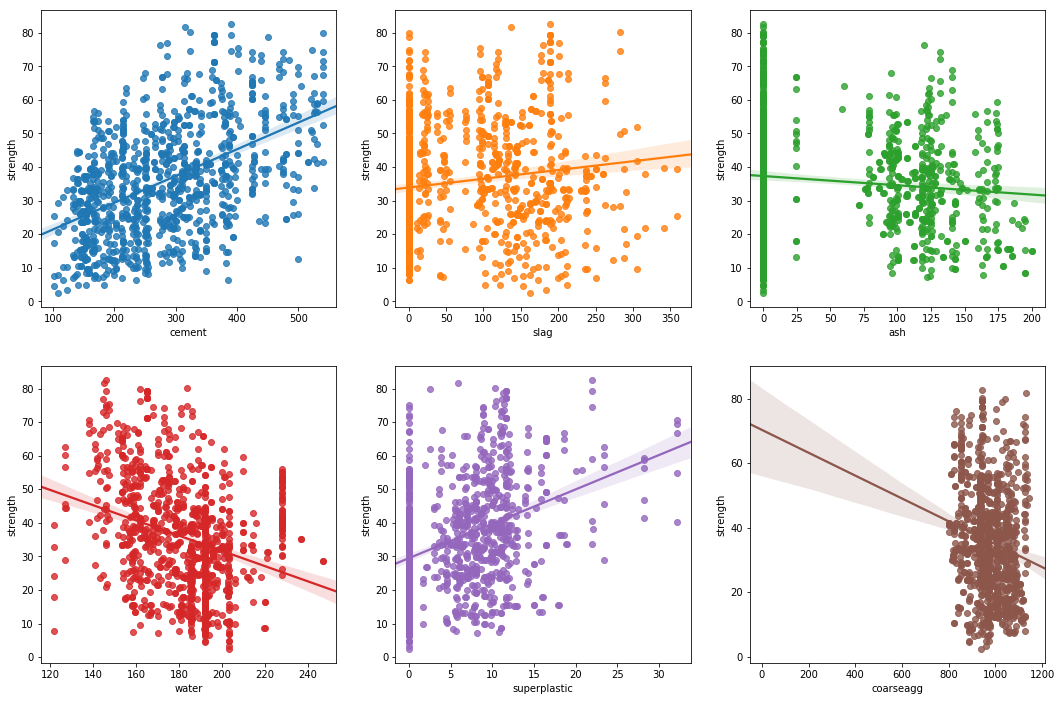

In [43]:
print("#######################################################################################")
print("################  Analysis on Target (Strength) and Dependent Variable  ###############")
print("#######################################################################################")
features_to_analyse = concrete_df.columns[:7]
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='strength', data = concrete_df, ax=ax)

<h3>
Observation </h3>
<h4>
We coukd observe from the above visivalization, there is strongest dependency between target and folowing variables:
1.cement
2.slag
3.fly aggr.
4.water
</h4>

In [45]:
print("#######################################################################################")
print("################  Mumerical Correlation Estimations,")
print("                 Analysis on Target (Strength) and Dependent Variable  ################")
print("#######################################################################################")


concrete_df[features_to_analyse].apply(lambda x: x.corr(concrete_df['strength']))

#######################################################################################
################  Mumerical Correlation Estimations,
                 Analysis on Target (Strength) and Dependent Variable  ################
#######################################################################################


cement          0.497832
slag            0.134829
ash            -0.105755
water          -0.289633
superplastic    0.366079
coarseagg      -0.164935
fineagg        -0.167241
dtype: float64

<h3>Modeling</h3>

In [7]:
X_train, X_test, y_train, y_test = train_test_split( 
          concrete_df[['ash', 'cement']], concrete_df['strength'], test_size = 0.1, random_state = 100) #train test split

In [8]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (927, 2)
Training Labels Shape: (927,)
Testing Features Shape: (103, 2)
Testing Labels Shape: (103,)


In [9]:
print("###################################################")
print("################  Cross validation  ###############")
print("###################################################")

cross_val = []
depths = range(1,10)

test = []
for i in depths:

    dt = tree.DecisionTreeRegressor(max_depth=i, min_samples_split=3, min_samples_leaf=2)
    dt.fit(X_train, y_train)
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=5, n_jobs=4, scoring='r2')
    print(scores)
    cross_val.append(scores.mean())
    predictions = dt.predict(X_test)
    test.append(r2_score(y_test, predictions))

###################################################
################  Cross validation  ###############
###################################################
[ 0.23561673  0.09599903  0.10920276  0.22763368  0.19222565]
[ 0.19245346  0.13171408  0.16971855  0.29468214  0.17470221]
[ 0.22843667  0.21682185  0.26160227  0.32909026  0.23225877]
[ 0.19774316  0.28153217  0.24273861  0.38110715  0.30978615]
[ 0.1679067   0.2627817   0.27202581  0.40015005  0.29696463]
[ 0.18323305  0.2816274   0.33263483  0.37706356  0.30153365]
[ 0.18659143  0.18847852  0.34117451  0.34815165  0.30980965]
[ 0.22641788  0.19978621  0.34802365  0.35476006  0.3412456 ]
[ 0.26061924  0.16689964  0.35761642  0.34797386  0.33004646]


##########################################################################
################  Cross Validation on Max Depth Parameter  ###############
##########################################################################


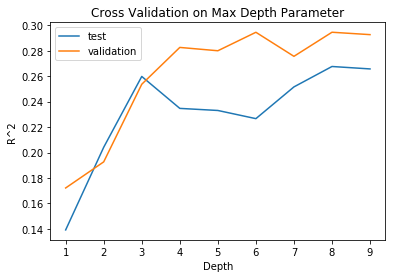

In [50]:
print("##########################################################################")
print("################  Cross Validation on Max Depth Parameter  ###############")
print("##########################################################################")
plt.plot(range(1,10),test, label='test')
plt.plot(range(1,10),cross_val, label = 'validation')
plt.title('Cross Validation on Max Depth Parameter')
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.legend()
plt.savefig('depth_tuning.png')

In [10]:
#RMSE: (Root mean squared error) Function
def rmse(y_pred, y): 
    return round(np.sqrt((y_pred - y)**2).mean(), 2)

In [11]:
print("##################################################################")
print("################  RMSE: (Root mean squared error)  ###############")
print("###################################################################")
dt = tree.DecisionTreeRegressor(max_depth=2, min_samples_split=2, min_samples_leaf=2)
dt = dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print('RMSE on the test data: {}'.format(rmse(predictions, y_test)))

##################################################################
################  RMSE: (Root mean squared error)  ###############
###################################################################
RMSE on the test data: 12.36


In [12]:
export_graphviz(concrete_df, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = 'strength',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

!dot -Tpng tree.dot -o tree.png -Gdpi=600

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

TypeError:       cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5      255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6      166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7      251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8      296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9      155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   
10     151.8  178.1  138.7  167.5          18.3      944.0    694.6   28   
11     173.0  116.0    0.0  192.0           0.0      946.8    856.8    3   
12     385.0    0.0    0.0  186.0           0.0      966.0    763.0   14   
13     237.5  237.5    0.0  228.0           0.0      932.0    594.0    7   
14     167.0  187.0  195.0  185.0           7.0      898.0    636.0   28   
15     213.8   98.1   24.5  181.7           6.7     1066.0    785.5  100   
16     237.5  237.5    0.0  228.0           0.0      932.0    594.0   28   
17     336.0    0.0    0.0  182.0           3.0      986.0    817.0   28   
18     190.7    0.0  125.4  162.1           7.8     1090.0    804.0    3   
19     312.7    0.0    0.0  178.1           8.0      999.7    822.2   28   
20     229.7    0.0  118.2  195.2           6.1     1028.1    757.6    3   
21     228.0  342.1    0.0  185.7           0.0      955.8    674.3    7   
22     236.0  157.0    0.0  192.0           0.0      972.6    749.1    7   
23     132.0  207.0  161.0  179.0           5.0      867.0    736.0   28   
24     331.0    0.0    0.0  192.0           0.0     1025.0    821.0   28   
25     310.0  143.0    0.0  168.0          10.0      914.0    804.0   28   
26     304.0   76.0    0.0  228.0           0.0      932.0    670.0   90   
27     425.0  106.3    0.0  153.5          16.5      852.1    887.1   91   
28     166.1    0.0  163.3  176.5           4.5     1058.6    780.1   28   
29     255.0   99.0   77.0  189.0           6.0      919.0    749.0   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1000   165.0    0.0  143.6  163.8           0.0     1005.6    900.9  100   
1001   233.8    0.0   94.6  197.9           4.6      947.0    852.2   28   
1002   316.1  210.7    0.0  185.7           0.0      977.0    689.3   28   
1003   323.7  282.8    0.0  183.8          10.3      942.7    659.9   56   
1004   250.0    0.0   95.7  191.8           5.3      948.9    857.2   28   
1005   387.0   20.0   94.0  157.0          14.3      938.0    845.0   28   
1006   158.0    0.0  195.0  220.0          11.0      898.0    713.0   28   
1007   288.0  192.0    0.0  192.0           0.0      932.0    717.8    3   
1008   213.5    0.0  174.2  154.6          11.7     1052.3    775.5  100   
1009   213.7   98.1   24.5  181.7           6.9     1065.8    785.4   28   
1010   190.3    0.0  125.2  166.6           9.9     1079.0    798.9    3   
1011   313.0    0.0    0.0  178.0           8.0     1000.0    822.0   28   
1012   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   90   
1013   359.0   19.0  141.0  154.0          10.9      942.0    801.0   28   
1014   153.1  145.0  113.0  178.5           8.0      867.2    824.0   28   
1015   298.0    0.0  107.0  186.0           6.0      879.0    815.0   28   
1016   140.0  133.0  103.0  200.0           7.0      916.0    753.0   28   
1017   139.6  209.4    0.0  192.0           0.0     1047.0    806.9  180   
1018   147.0  115.0   89.0  202.0           9.0      860.0    829.0   28   
1019   288.0  192.0    0.0  192.0           0.0      932.0    717.8    7   
1020   183.9  122.6    0.0  203.5           0.0      959.2    800.0    7   
1021   203.5  305.3    0.0  203.5           0.0      963.4    630.0    3   
1022   144.8    0.0  133.6  180.8          11.1      979.5    811.5   28   
1023   141.3  212.0    0.0  203.5           0.0      971.8    748.5    7   
1024   297.2    0.0  117.5  174.8           9.5     1022.8    753.5    3   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
5        21.86  
6        15.75  
7        36.64  
8        21.65  
9        28.99  
10       36.35  
11        6.94  
12       27.92  
13       26.26  
14       23.89  
15       49.97  
16       30.08  
17       44.86  
18       15.04  
19       25.10  
20       13.36  
21       21.92  
22       20.42  
23       33.30  
24       31.74  
25       45.30  
26       49.19  
27       65.20  
28       21.54  
29       33.80  
...        ...  
1000     37.96  
1001     22.84  
1002     38.70  
1003     80.20  
1004     27.22  
1005     50.24  
1006      8.54  
1007     16.11  
1008     59.30  
1009     45.71  
1010     12.55  
1011     25.10  
1012     29.39  
1013     62.94  
1014     26.23  
1015     42.64  
1016     36.44  
1017     44.21  
1018     19.99  
1019     23.52  
1020     10.79  
1021      9.56  
1022     13.20  
1023     10.39  
1024     21.91  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61  

[1030 rows x 9 columns] is not an estimator instance.

In [13]:
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [14]:
X_train, X_test, y_train, y_test = train_test_split( 
          concrete_df[['ash', 'cement', 'slag', 'water', 'superplastic', 'coarseagg', 'fineagg']], concrete_df['strength'], test_size = 0.1, random_state = 100) #train test split

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
print("########################################################")
print("################  Random grid to search  ###############")
print("########################################################")

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

########################################################
################  Random grid to search  ###############
########################################################
Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
print("########################################################")
print("R^2 Score of Fandom Forest with tuned parameters with GridSearch: {}".format(round(r2_score(y_test, rf_random.predict(X_test)), 2)))
print("########################################################")
print("RMSE Score of Fandom Forest with tuned parameters with GridSearch: {}".format(round(rmse(y_test, rf_random.predict(X_test)), 2)))

In [ ]:
print("Featurization, Model Selection & Tuning")